In [462]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [463]:
a = 'XY_bal_log_Rel.txt'
cols = ['E_peak', 'beta', 'sigma', 'beta_Rel', '0,1=astro,DM']

In [464]:
# Leer el título del archivo
title = pd.read_csv(a, nrows=0, usecols=[0])
title = title.columns.values[0]
print(title)

E_peak beta sigma beta_Rel 0


In [465]:
# Leer los datos del archivo
data = pd.read_csv(a, sep='\s+', names=cols, skiprows=1, header=None)
data.sample(5)

,E_peak,beta,sigma,beta_Rel,"0,1=astro,DM"
404,-0.281233,-1.058986,0.911008,0.056372,0.0
3684,3.666237,-1.597223,0.871806,0.519637,1.0
3123,1.882012,-1.099196,0.729408,0.103087,1.0
1936,0.971220,-1.179799,1.207933,-0.110931,0.0
5193,2.154120,-1.243516,0.690107,-0.452640,1.0


In [466]:
data.describe()

,E_peak,beta,sigma,beta_Rel,"0,1=astro,DM"
count,5662.000000,5662.000000,5662.000000,5662.000000,5662.000000
mean,1.018241,-0.819062,1.061131,-0.061574,0.500000
std,1.667957,0.413740,0.357026,0.478845,0.500044
min,-5.912006,-2.602060,0.608098,-3.198657,0.000000
25%,-0.086760,-1.093827,0.778414,-0.301915,0.000000
50%,0.883369,-0.805070,0.973677,-0.045029,0.500000
75%,2.302818,-0.502967,1.254676,0.287035,1.000000
max,5.918502,0.000000,2.899104,1.866966,1.000000


In [467]:
# Eliminate any strong dependencies or correlations between the variables
data.corr()
# On the bottom row we can see that the correlation between the variables is very low, therefore we can use all of them.

,E_peak,beta,sigma,beta_Rel,"0,1=astro,DM"
E_peak,1.000000,0.108252,-0.116761,0.355409,0.662491
beta,0.108252,1.000000,-0.106935,-0.294714,0.280305
sigma,-0.116761,-0.106935,1.000000,-0.347368,-0.143709
beta_Rel,0.355409,-0.294714,-0.347368,1.000000,0.329702
"0,1=astro,DM",0.662491,0.280305,-0.143709,0.329702,1.000000


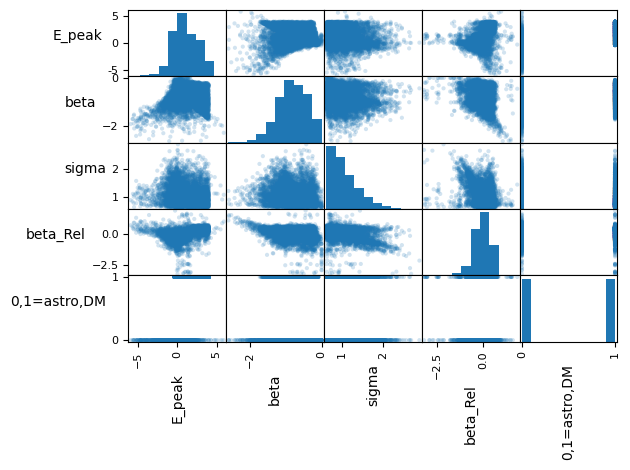

In [468]:
# Scatter matrix t show the relationship between the variables (two by two)
axes = pd.plotting.scatter_matrix(data, alpha=0.2)
# need to rotate axis labels so we can read them
for ax in axes.flatten():
    ax.xaxis.label.set_rotation(90)
    ax.yaxis.label.set_rotation(0)
    ax.yaxis.label.set_ha('right')

plt.tight_layout()
plt.gcf().subplots_adjust(wspace=0, hspace=0)
plt.show()

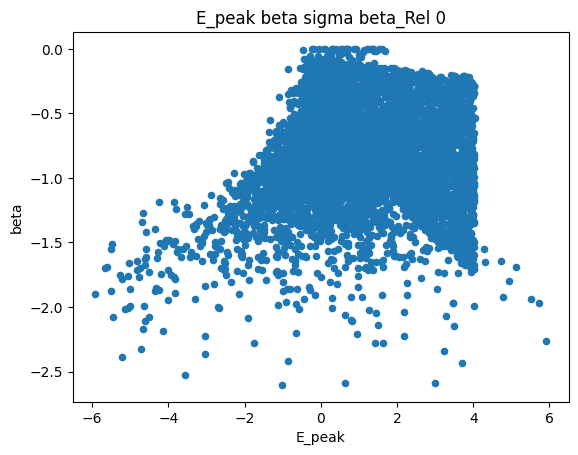

In [469]:
data.plot(x='E_peak', y='beta', kind='scatter', title=title)
plt.show()

In [470]:
cdf=data[['E_peak','beta', 'sigma', 'beta_Rel']]
cdf.sample(9)

,E_peak,beta,sigma,beta_Rel
499,0.349666,-1.457175,0.880711,0.350936
2422,-0.162430,-1.292430,0.806295,0.344739
4679,1.466719,-0.534617,0.727623,0.395733
882,-5.045912,-2.008774,1.104094,0.644258
69,0.751010,-1.220404,1.256641,-0.109351
553,-0.729181,-1.721246,0.825880,0.591650
894,0.637950,-0.948462,0.745715,0.020344
4380,3.286456,-0.935542,0.792041,0.202714
4934,0.372912,-0.267365,0.970161,-0.412904


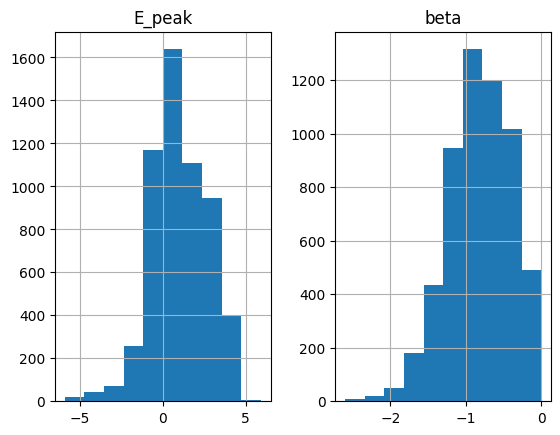

In [471]:
viz = cdf[['E_peak','beta']]
viz.hist()
plt.show()

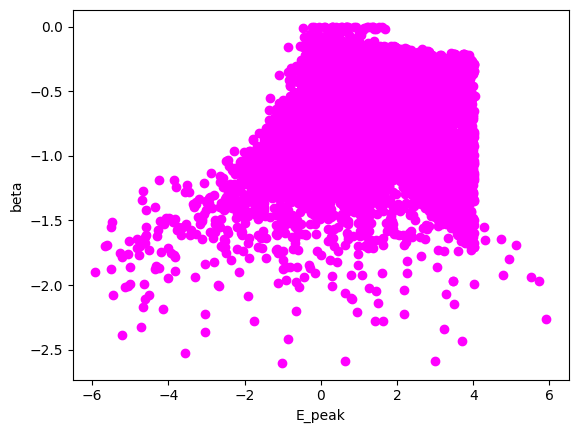

In [472]:
plt.scatter(cdf.E_peak, cdf.beta,  color='magenta')
plt.xlabel("E_peak")
plt.ylabel("beta")
plt.show()

In [473]:
# Extracción de variables de entrada y salida
X = cdf.E_peak.to_numpy()
Y = cdf.beta.to_numpy()

You should standardize your input features so the model doesn't inadvertently favor any feature due to its magnitude.
The typical way to do this is to subtract the mean and divide by the standard deviation. This shuld be done to the tran and test data separately, not to the whole data.

Example:

from sklearn import preprocessing

std_scaler = preprocessing.StandardScaler()

X_std = std_scaler.fit_transform(X)

pd.DataFrame(X_std).describe().round(2)


In [474]:
# División de los datos en entrenamiento y prueba
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [475]:
type(X_train), np.shape(X_train), np.shape(X_train)

(numpy.ndarray, (4529,), (4529,))

# Construcción del modelo simple de regresión lineal

In [476]:
from sklearn import linear_model

# create a model object
regressor = linear_model.LinearRegression()

# train the model on the training data
# X_train is a 1-D array but sklearn models expect a 2D array as input for the training data, with shape (n_observations, n_features).
# So we need to reshape it. We can let it infer the number of observations using '-1'.
regressor.fit(X_train.reshape(-1, 1), y_train)

# Print the coefficients
print ('Coefficients: ', regressor.coef_[0]) # with simple linear regression there is only one coefficient, here we extract it from the 1 by 1 array.
print ('Intercept: ',regressor.intercept_)

# Coefficient and Intercepet are the regression parameters that the model has learned from the training data.
# They define the slope and the intercept of the line that best fits the data.

Coefficients:  0.027522145984573424
Intercept:  -0.8445220308037715


# Visulize model outputs

Text(0, 0.5, 'beta')

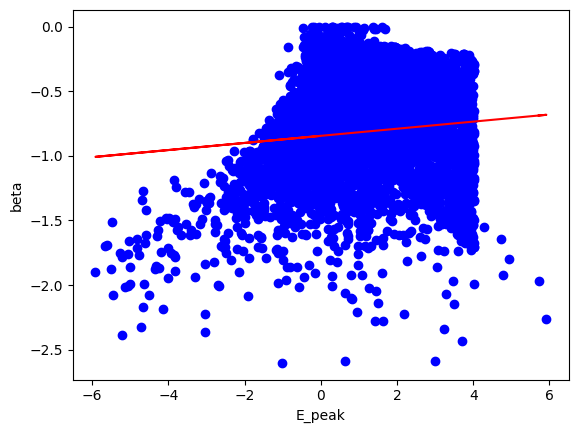

In [477]:
plt.scatter(X_train, y_train,  color='blue')
plt.plot(X_train, regressor.coef_ * X_train + regressor.intercept_, '-r')
plt.xlabel("E_peak")
plt.ylabel("beta")

# Model Evaluation

In [478]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, root_mean_squared_error, r2_score

# Use the predict method to make test predictions
y_test_ = regressor.predict( X_test.reshape(-1,1))

print("Mean absolute error: %.2f" % mean_absolute_error(y_test_, y_test))
print("Mean squared error: %.2f" % mean_squared_error(y_test_, y_test))
print("Root mean squared error: %.2f" % root_mean_squared_error(y_test_, y_test))
print("R2-score: %.2f" % r2_score( y_test_, y_test) )

Mean absolute error: 0.34
Mean squared error: 0.17
Root mean squared error: 0.42
R2-score: -79.93


## Plot the regression model result over the test data instead of the training data

Text(0, 0.5, 'beta')

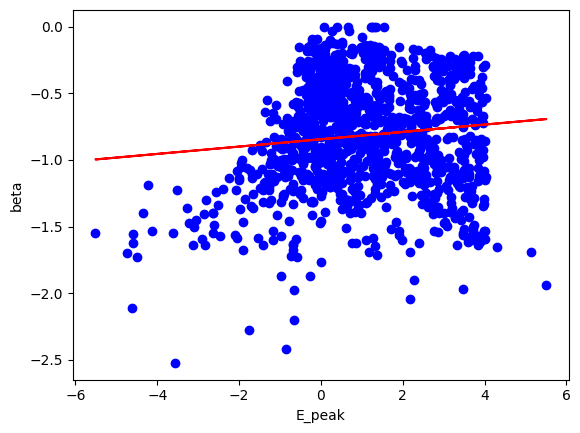

In [479]:
plt.scatter(X_test, y_test,  color='blue')
plt.plot(X_test, regressor.coef_ * X_test + regressor.intercept_, '-r')
plt.xlabel("E_peak")
plt.ylabel("beta")